In [2]:
import pandas as pd #this imports pandas as pd to shorten function calls
print(pd.__version__)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re # find digits in string

1.3.4


In [16]:
df = pd.read_pickle('Data/combined_ww.pkl')
#print(df.columns[100:200])
enforce = pd.read_csv('Data/Enforce.csv')
#print(df.columns[100:200])
enforce = enforce.rename(columns={'Period': 'Year'})
enforce16 = enforce[enforce['Year'] == 2016]
enforce16.head();
enforce16 = enforce16[["SpatialDimValueCode","Value"]]
enforce16 = enforce16.rename(columns={'Value': '2016', "SpatialDimValueCode": "Code"})
enforce16 = enforce16.set_index("Code")
enforce16.columns = ["EnforceBansTobaccoAd_"+str(x) for x in enforce16.columns]
enforce16.head()
#EnforceBansTobaccoAd_2010, 2007, 2012, 2014
#get 2016, 2018 from enforce.csv

df = pd.DataFrame().join([df, enforce16], how="outer")
enforce = df[["EnforceBansTobaccoAd_" + str(x) for x in (2007,2010,2012,2014,2016)]]

In [26]:
death = df[["deathRate_" + str(x) for x in (2007,2010,2012,2014,2016)]]
cbd_dropped = pd.DataFrame().join([enforce, death], how="outer")
print(cbd_dropped.shape)
cbd_dropped = cbd_dropped.dropna()
print(cbd_dropped.shape)
death = cbd_dropped[["deathRate_" + str(x) for x in (2007,2010,2012,2014,2016)]]
enforce = cbd_dropped[["EnforceBansTobaccoAd_" + str(x) for x in (2007,2010,2012,2014,2016)]]

(207, 10)
(185, 10)


In [40]:
for year in (2007,2010,2012,2014,2016):
    print(len(cbd_dropped['EnforceBansTobaccoAd_' + str(year)]))
type(cbd_dropped[['EnforceBansTobaccoAd_2016']])
for year in (2007,2010,2012,2014,2016):
    print(cbd_dropped[['EnforceBansTobaccoAd_' + str(year)]].value_counts().sort_index(ascending=True))

185
185
185
185
185
EnforceBansTobaccoAd_2007
2.0                          91
3.0                           3
4.0                          84
5.0                           7
dtype: int64
EnforceBansTobaccoAd_2010
2.0                          72
3.0                           1
4.0                          96
5.0                          16
dtype: int64
EnforceBansTobaccoAd_2012
2.0                           63
3.0                            1
4.0                          100
5.0                           21
dtype: int64
EnforceBansTobaccoAd_2014
2.0                           55
3.0                            1
4.0                          101
5.0                           28
dtype: int64
EnforceBansTobaccoAd_2016
2.0                           15
3.0                           34
4.0                          111
5.0                           25
dtype: int64


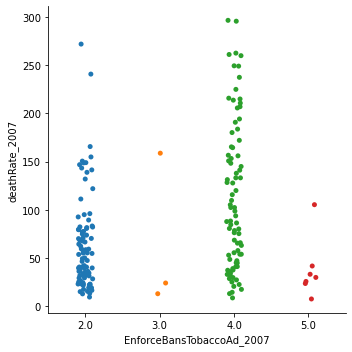

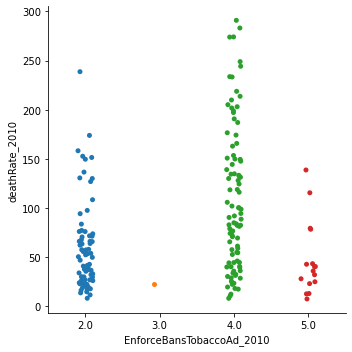

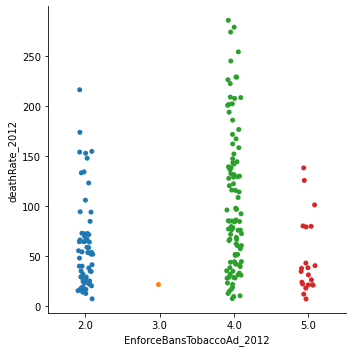

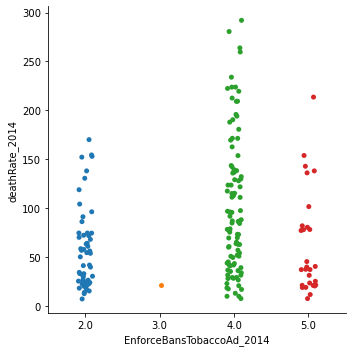

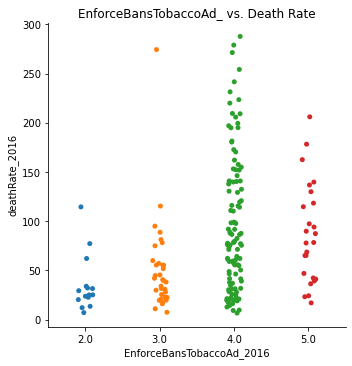

In [25]:
for year in (2007,2010,2012,2014,2016):
    sns.catplot(data = cbd_dropped,
                   x="EnforceBansTobaccoAd_" + str(year),
                   y="deathRate_" + str(year),
                    label =year)
plt.title("EnforceBansTobaccoAd_ vs. Death Rate");

In [53]:
encoded = list()
for year in (2007,2010,2012,2014,2016):
    encoded.append(pd.get_dummies(enforce['EnforceBansTobaccoAd_' + str(year)])) 
#encoded = pd.DataFrame().join(encoded, how="outer")

In [54]:
from sklearn.linear_model import LinearRegression as lr

In [72]:
years = [2007,2010,2012,2014,2016]
for i in range(5):
    x = encoded[i]
    y = death["deathRate_" + str(years[i])]
    #print(x.shape)
    #print(y.shape)
    reg = lr().fit(x, y)
    print(reg.score(x, y))
    print(reg.coef_)
    #plt.scatter(x, y,color='g')
    #plt.plot(x, reg.predict(x),color='b')

0.1464514591590762
[ -6.01727022  -5.07700377  43.32444787 -32.23017389]
0.1524878264473346
[  0.63868889 -36.61509536  48.40506219 -12.42865572]
0.13852429571907532
[  1.87813799 -36.33149185  45.32558484 -10.87223099]
0.11620848972713482
[ -3.24772869 -39.03431539  40.75524415   1.52679993]
0.12117733121653096
[-32.38869079 -16.85525809  29.80241891  19.44152998]


In [74]:
pd.to_pickle(df,"Data/combined_enforce.pkl")